In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1=pd.read_csv('/content/drive/MyDrive/archive (5)/Athletes_summer_games.csv')
df2=pd.read_csv('/content/drive/MyDrive/archive (5)/Athletes_winter_games.csv')
df3=pd.read_csv('/content/drive/MyDrive/archive (5)/regions.csv')

In [3]:
df1.head(2)

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [4]:
df2.head(2)

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
1,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [5]:
df4=pd.concat([df1,df2],axis=0)

In [6]:
df4.head()

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [7]:
df4.index += 1

In [8]:
df4=df4.drop(['Unnamed: 0'],axis=1)

In [9]:
df3.head(2)

,Unnamed: 0,NOC,region,notes
0,0,EOR,Refugee,NaN
1,1,LBN,Lebanon,NaN


In [10]:
df3=df3.drop(['Unnamed: 0'],axis=1)

In [11]:
df=df4.merge(df3,how='left', on='NOC')
df.head()

,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [12]:
df.shape

(286237, 14)

In [13]:
df.columns

Index(['Name', 'Sex', 'Age', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286237 entries, 0 to 286236
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    286237 non-null  object 
 1   Sex     286237 non-null  object 
 2   Age     276763 non-null  float64
 3   Team    286237 non-null  object 
 4   NOC     286237 non-null  object 
 5   Games   286237 non-null  object 
 6   Year    286237 non-null  int64  
 7   Season  286237 non-null  object 
 8   City    286237 non-null  object 
 9   Sport   286237 non-null  object 
 10  Event   286237 non-null  object 
 11  Medal   42232 non-null   object 
 12  region  286214 non-null  object 
 13  notes   5163 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 32.8+ MB


In [15]:
df.describe()

,Age,Year
count,276763.000000,286237.000000
mean,25.622916,1980.577214
std,6.359116,30.531887
min,10.000000,1896.000000
25%,22.000000,1964.000000
50%,25.000000,1988.000000
75%,28.000000,2004.000000
max,97.000000,2020.000000


In [16]:
df.isna().sum()

Name           0
Sex            0
Age         9474
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     244005
region        23
notes     281074
dtype: int64

In [17]:
df.columns[df.isna().any()].tolist()

['Age', 'Medal', 'region', 'notes']

In [18]:
df.query('Team == "India"').head(5)

,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
436,S. Abdul Hamid,M,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
437,S. Abdul Hamid,M,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
790,Shiny Kurisingal Abraham-Wilson,F,19.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
791,Shiny Kurisingal Abraham-Wilson,F,19.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
792,Shiny Kurisingal Abraham-Wilson,F,23.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


**Top 10 countries participated**

In [19]:
top_10 = df.Team.value_counts().sort_values(ascending=False).head(10)
top_10

United States    18703
France           12526
Great Britain    11952
Italy            10784
Germany           9923
Canada            9788
Japan             9076
Sweden            8225
Australia         8151
Hungary           6784
Name: Team, dtype: int64

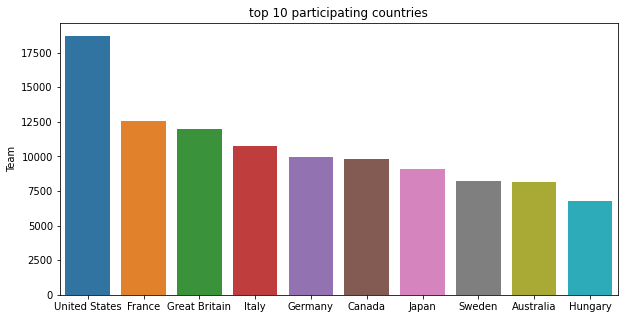

In [20]:
plt.figure(figsize=(10,5))
plt.title('top 10 participating countries')
sns.barplot(x=top_10.index,y=top_10)

**Age distribution**

(array([1.4000e+01, 2.3100e+02, 3.0870e+03, 9.4480e+03, 2.0473e+04,
        3.5828e+04, 4.4659e+04, 4.3981e+04, 3.5980e+04, 2.7456e+04,
        1.8470e+04, 1.2083e+04, 7.7290e+03, 4.8200e+03, 3.2360e+03,
        2.2860e+03, 1.7140e+03, 1.3090e+03, 8.7200e+02, 7.9100e+02,
        4.9900e+02, 4.6400e+02, 2.7700e+02, 2.1400e+02, 1.7700e+02,
        1.5900e+02, 1.2000e+02, 1.1400e+02, 5.8000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <a list of 34 Patch objects>)

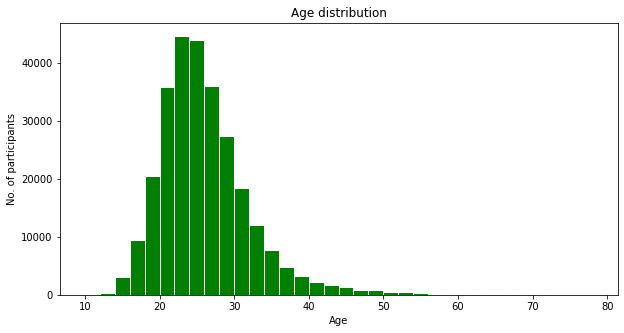

In [21]:
plt.figure(figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('No. of participants')
plt.title('Age distribution')
plt.hist(df.Age, bins=np.arange(10,80,2),color='green',edgecolor='white')

**Participation by gender**

In [22]:
gender_count=df.Sex.value_counts()
gender_count

M    204449
F     81788
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd256c94d60>,
 [Text(-0.6857821402207193, 0.8600597980107487, 'M'),
  Text(0.6857821402207197, -0.8600597980107485, 'F')],
 [Text(-0.3740629855749378, 0.46912352618768105, '71.4%'),
  Text(0.37406298557493795, -0.46912352618768094, '28.6%')])

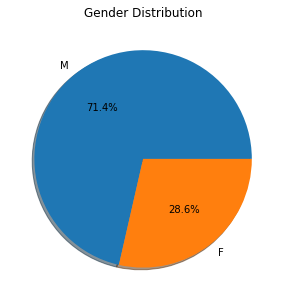

In [23]:
plt.figure(figsize=(10,5))
plt.title('Gender Distribution')
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', shadow=True)

**Total no. of medals**

In [24]:
df.Medal.value_counts()

Gold      14172
Bronze    14162
Silver    13898
Name: Medal, dtype: int64

**Number of female participants each year**

In [25]:
female_participants=df[(df.Sex=='F')][['Sex','Year']]
female_participants=female_participants.groupby('Year').count().reset_index()
female_participants.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [26]:
f_participants=df[(df.Sex=='F')]

Text(0.5, 1.0, 'female participants')

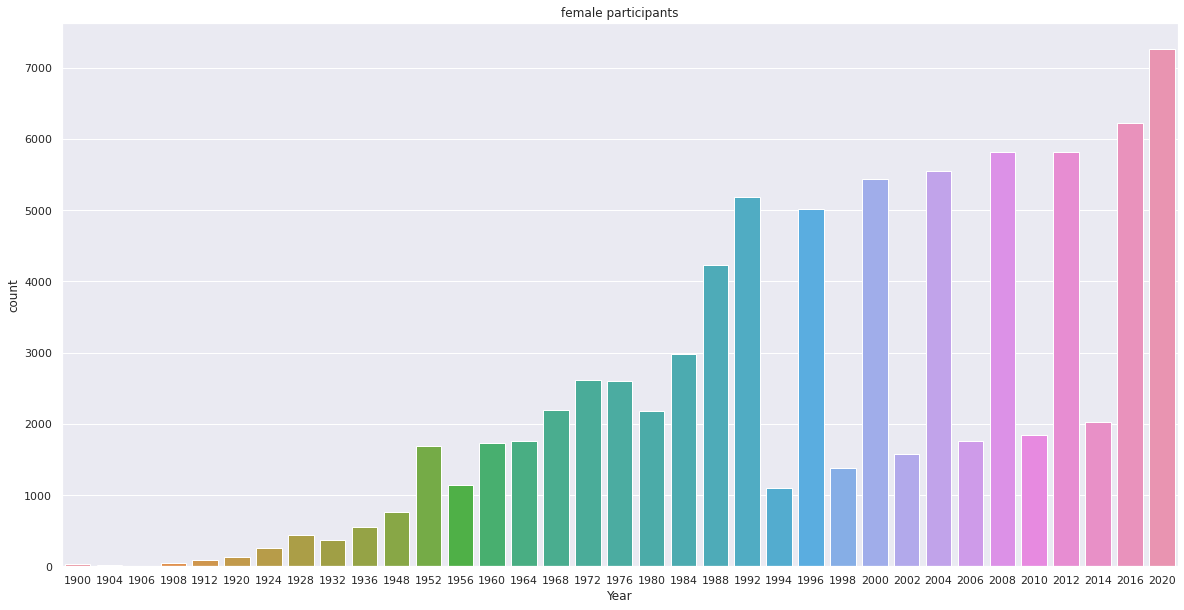

In [27]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=f_participants)
plt.title('female participants')

**Gold medal from each country**

In [30]:
df.columns

Index(['Name', 'Sex', 'Age', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [32]:
GoldMedals=df[(df.Medal=='Gold')]
GoldMedals.region.value_counts().reset_index(name='Medal').head()


,index,Medal
0,USA,2751
1,Russia,1640
2,Germany,1322
3,UK,719
4,Italy,597


Text(0.5, 1.0, 'Gold Meadals for top 10 Country')

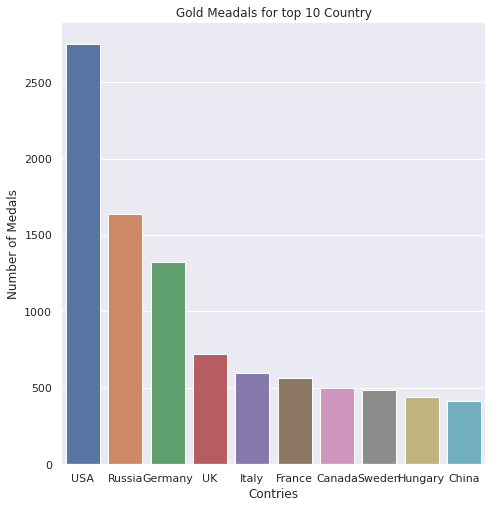

In [42]:
gold_medal=GoldMedals.region.value_counts().reset_index(name='Medal').head(10)
a=sns.catplot(x='index',y='Medal',data=gold_medal, kind='bar', height=7)
a.despine(left=True)
a.set_xlabels('Contries')
a.set_ylabels('Number of Medals')
plt.title('Gold Meadals for top 10 Country')

**Number of Gold medals in 2020 per Country**

In [48]:
max_year=df.Year.max()
team_name=df[(df.Year==max_year) & (df.Medal=='Gold')].Team
team_name.value_counts().head()

United States    113
Japan             68
France            65
China             59
Great Britain     41
Name: Team, dtype: int64

Text(0.5, 1.0, 'Countrywise Gold Medal for the year 2020')

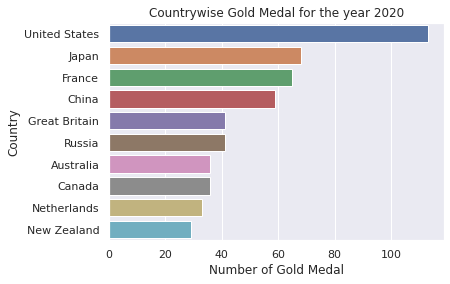

In [55]:
sns.barplot(x=team_name.value_counts().head(10),y=team_name.value_counts().head(10).index)
plt.ylabel('Country')
plt.xlabel('Number of Gold Medal')
plt.title('Countrywise Gold Medal for the year 2020')